In [1]:
import sys
sys.path.append('..')

In [2]:
import os
import csv

import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.utils.data.dataloader import DataLoader
from torch.utils.data.dataset import TensorDataset
from torchvision.utils import make_grid
import pandas as pd
from pandas.api.types import CategoricalDtype

from defences.util import score
from models.numeric import NumericModel
from models.mnist import BaseModel

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [5]:
adv_files = [
    'mnist_basic_apgd_0.063_adv.npy',
    'mnist_basic_apgd_0.3_adv.npy',
    'mnist_basic_apgd_1.0_adv.npy',
    'mnist_basic_apgd_1.5_size16_adv.npy',
    'mnist_basic_apgd1_0.063_size16_adv.npy',
    'mnist_basic_apgd1_0.3_size16_adv.npy',
    'mnist_basic_apgd1_1.0_size16_adv.npy',
    'mnist_basic_apgd1_1.5_size16_adv.npy',
    'mnist_basic_apgd2_0.063_size16_adv.npy',
    'mnist_basic_apgd2_0.3_size16_adv.npy',
    'mnist_basic_apgd2_1.0_size16_adv.npy',
    'mnist_basic_apgd2_1.5_size16_adv.npy',
    'mnist_basic_bim_0.063_adv.npy',
    'mnist_basic_bim_0.3_adv.npy',
    'mnist_basic_bim_1.0_adv.npy',
    'mnist_basic_bim_1.5_size16_adv.npy',
    'mnist_basic_boundary_0.3_adv.npy',
    'mnist_basic_cw2_0.0_adv.npy',
    'mnist_basic_cw2_10.0_adv.npy',
    'mnist_basic_cw2_100.0_adv.npy',
    'mnist_basic_cwinf_0.0_size16_adv.npy',
    'mnist_basic_cwinf_10.0_size16_adv.npy',
    'mnist_basic_cwinf_100.0_size16_adv.npy',
    'mnist_basic_deepfool_0.001_adv.npy',
    'mnist_basic_deepfool_1e-06_adv.npy',
    'mnist_basic_fgsm_0.063_adv.npy',
    'mnist_basic_fgsm_0.3_adv.npy',
    'mnist_basic_fgsm_1.0_adv.npy',
    'mnist_basic_fgsm_1.5_size16_adv.npy',
    'mnist_basic_jsma_0.063_size16_adv.npy',
    'mnist_basic_jsma_0.3_size16_adv.npy',
    'mnist_basic_jsma_1.0_size16_adv.npy',
    'mnist_basic_shadow_0.3_size16_adv.npy',
]


In [6]:
def show_img(img_path, title=None):
    X = np.load(os.path.join('..', 'results', img_path))
    image = make_grid(torch.from_numpy(X[:16])).permute(1, 2, 0).detach().numpy()
    plt.figure(figsize=(14, 4))
    plt.imshow(image)
    plt.axis('off')
    if title is None:
        fragments = img_path.split('_')
        title = fragments[2] + ' eps:' + fragments[3]
    plt.title(title)
    plt.show()

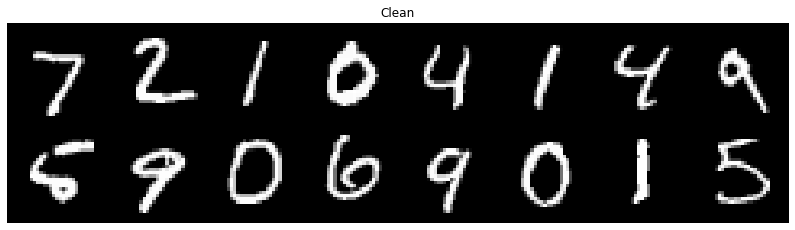

In [7]:
show_img('mnist_basic_apgd_0.063_x.npy', 'Clean')

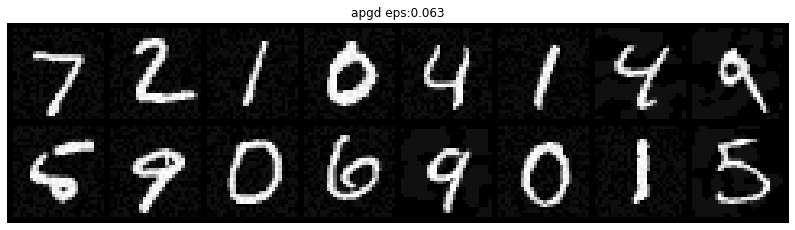

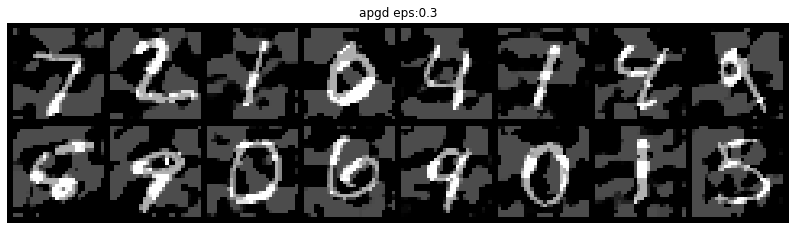

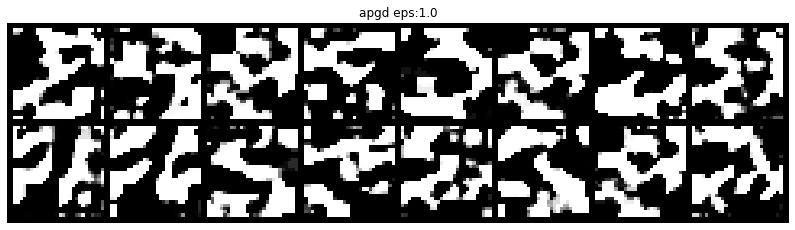

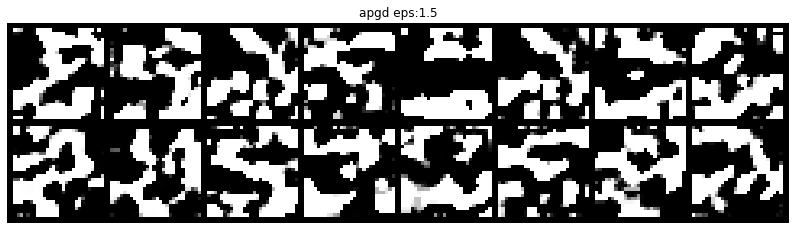

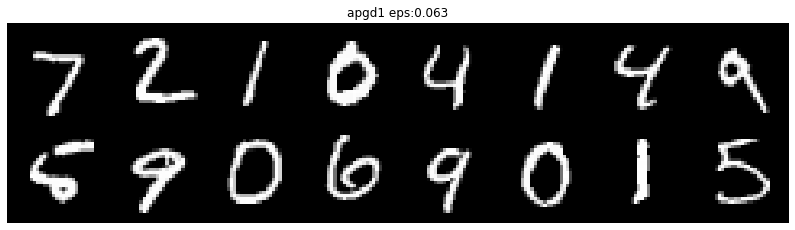

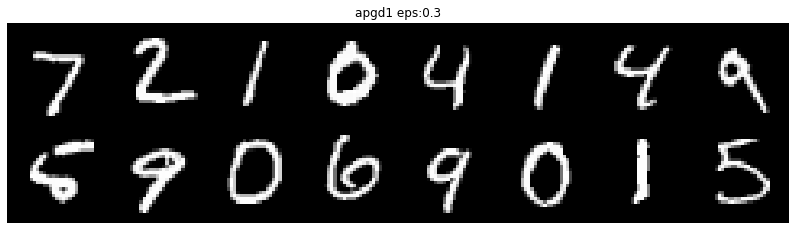

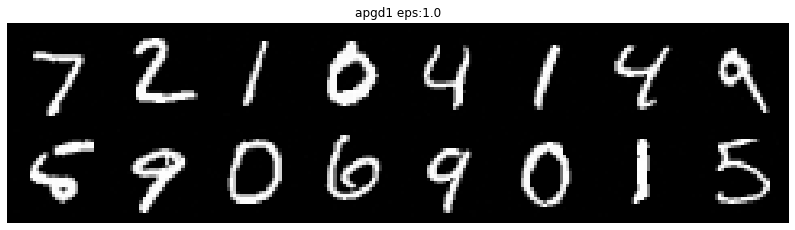

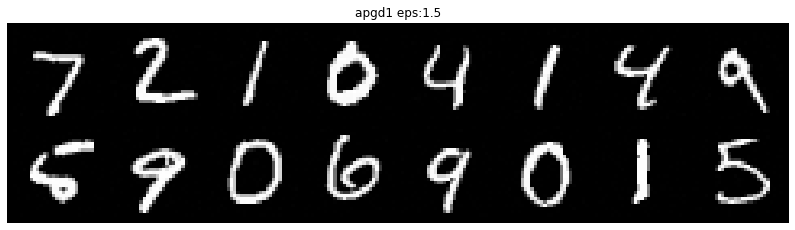

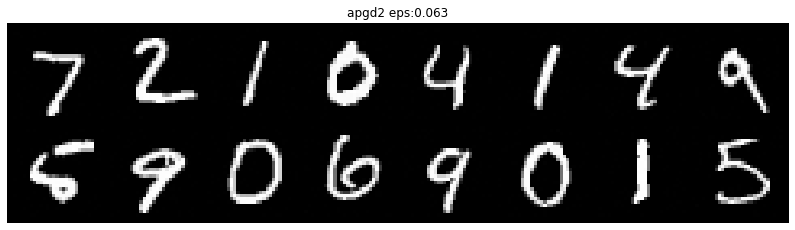

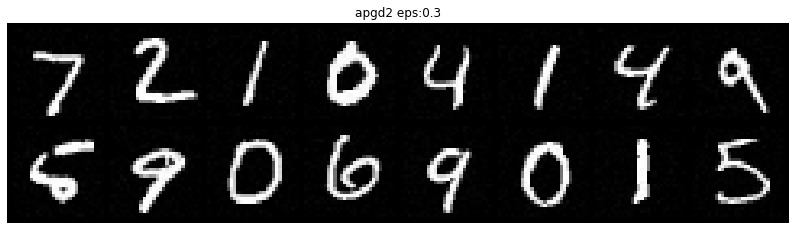

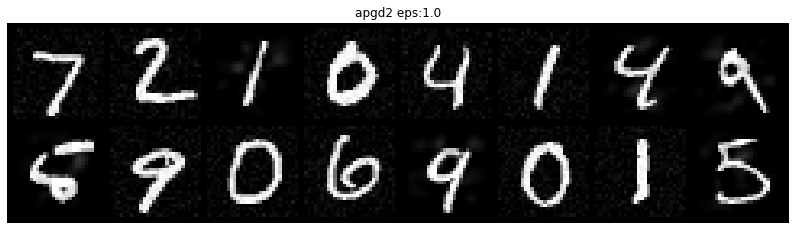

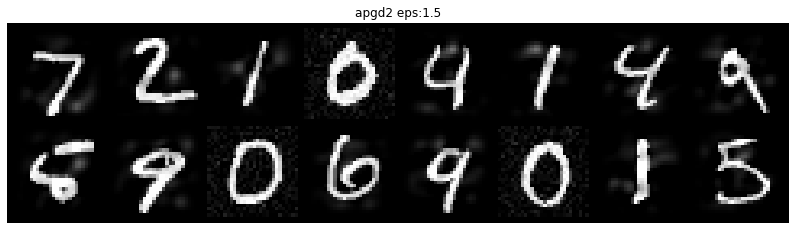

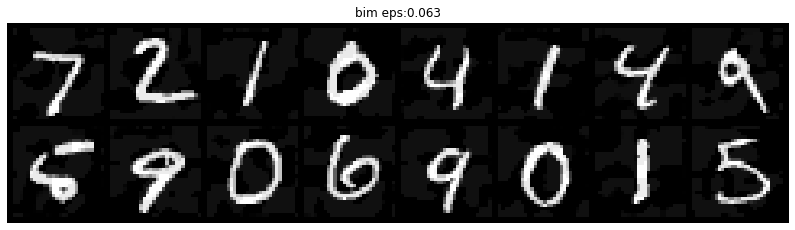

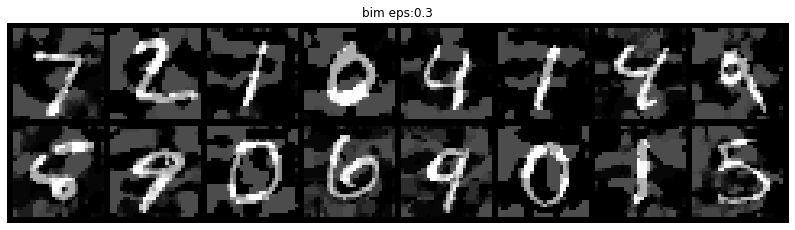

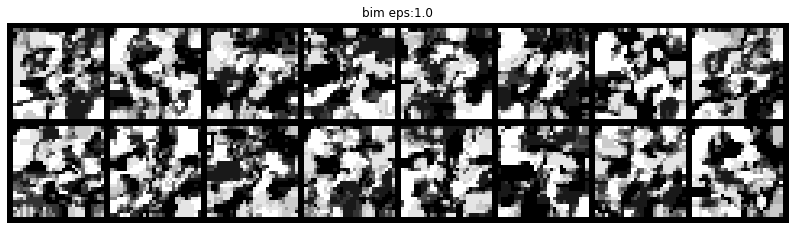

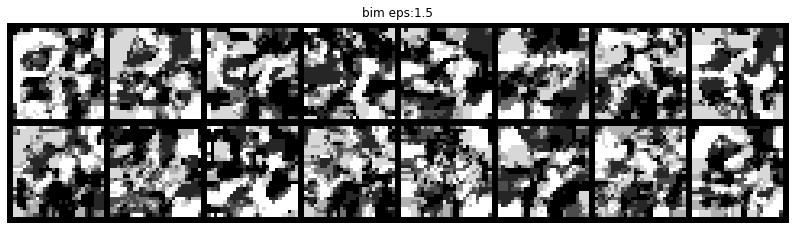

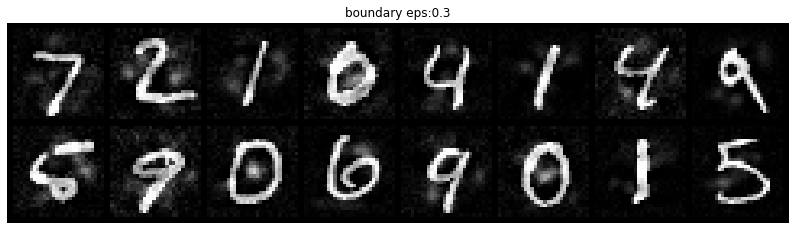

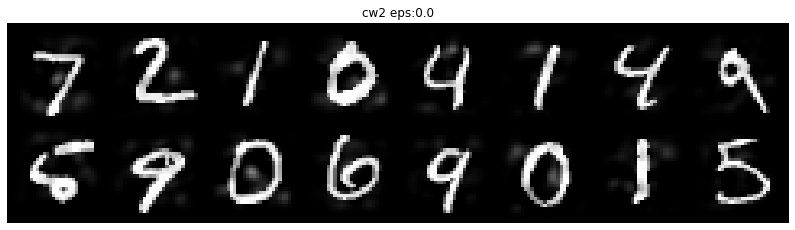

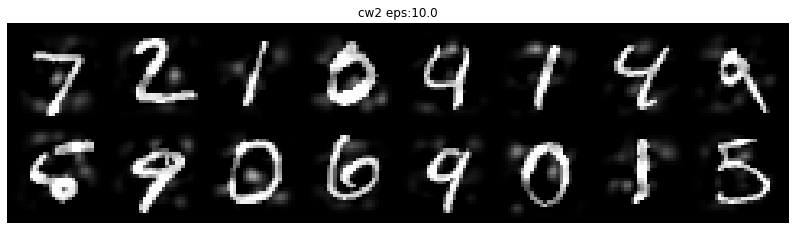

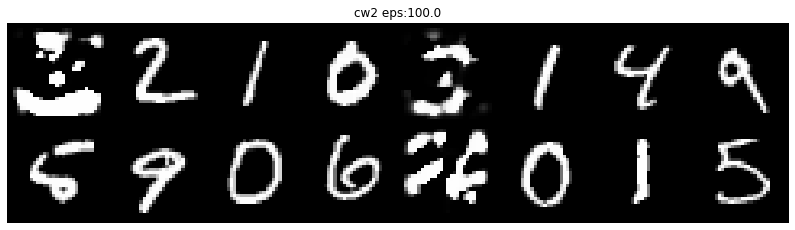

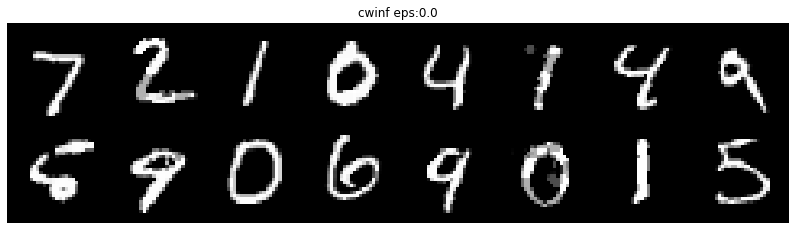

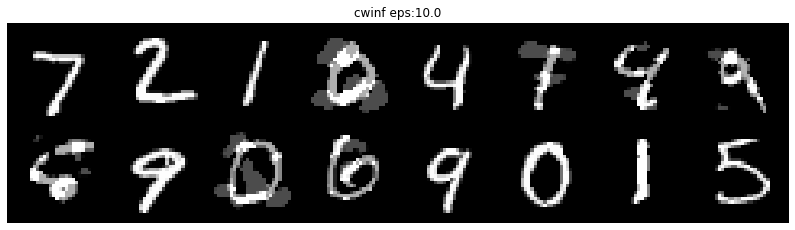

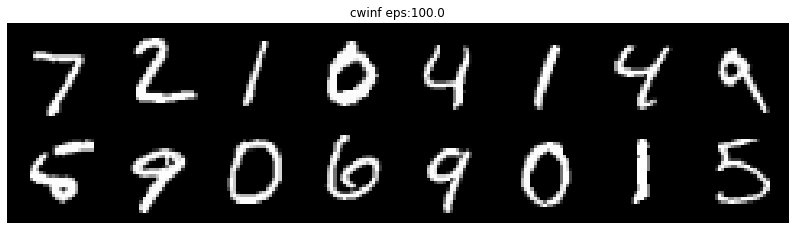

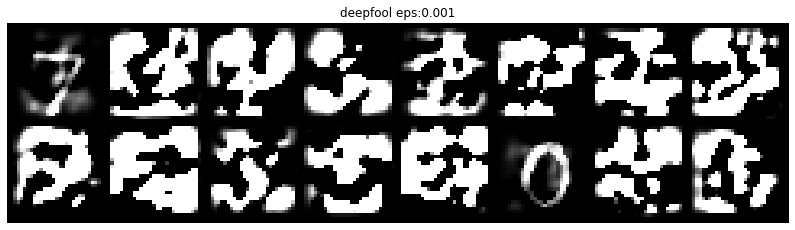

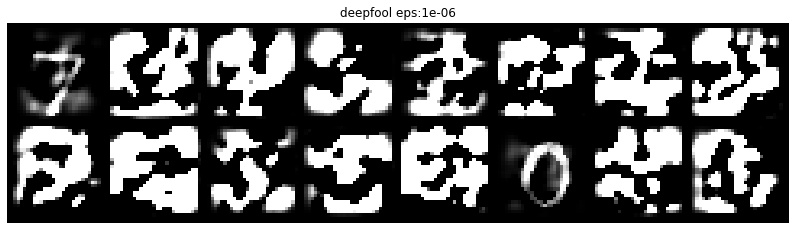

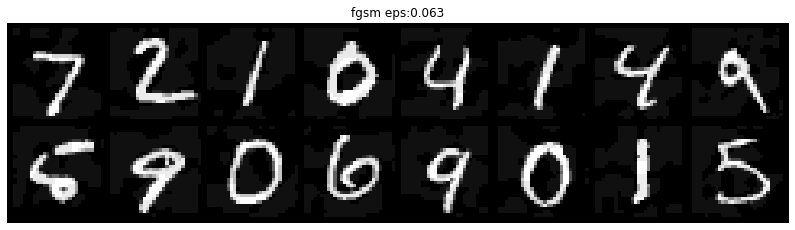

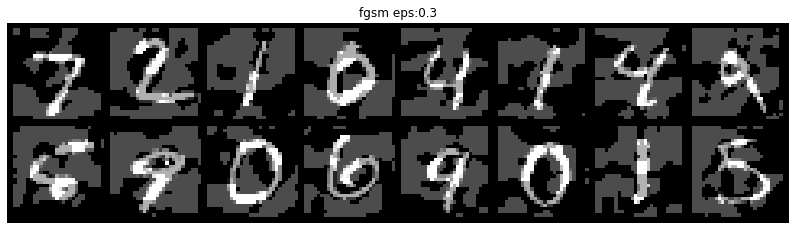

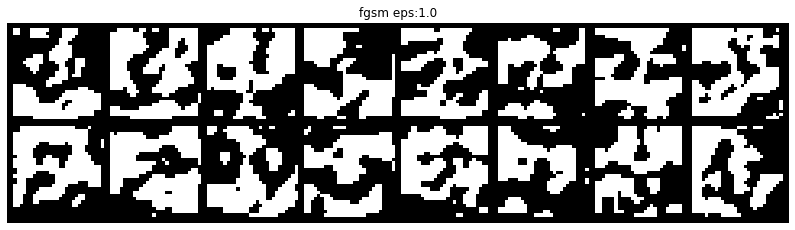

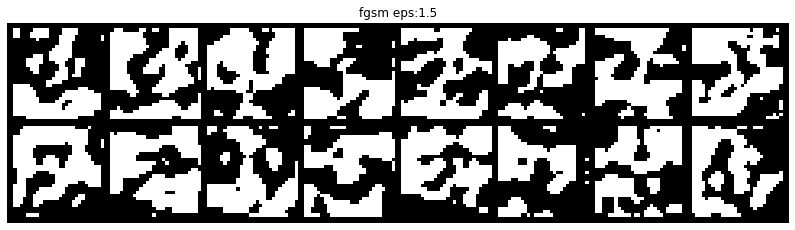

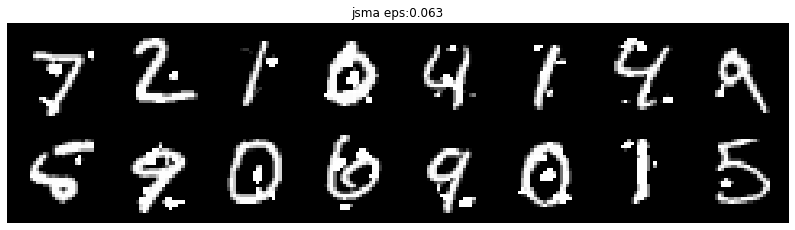

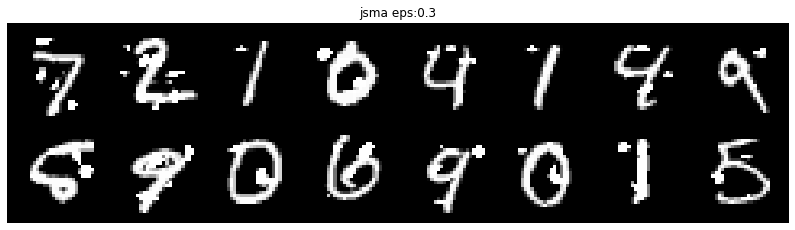

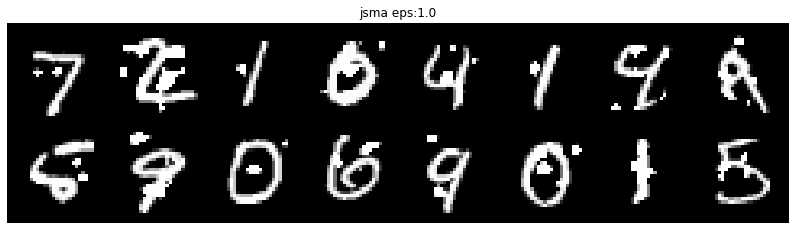

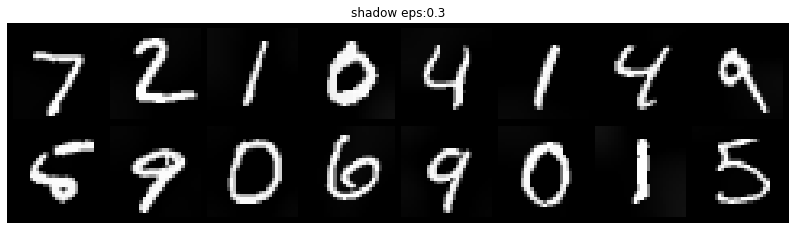

In [9]:

for adv in adv_files:
    show_img(adv)